# 1. Importing modules and functions

In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from molvs import standardize_smiles
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import permutation_test_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import pairwise_distances
import joblib
import pickle
from IPython.display import HTML
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.3f}'.format

# 2.Data entry and curation work set

In [2]:
tr = pd.read_csv('HDAC6_CDK_ws.csv', sep=";")

In [3]:
y_tr=tr.HDAC6_measured

In [4]:
y_tr

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
Name: HDAC6_measured, dtype: int64

In [5]:
x_tr=tr.drop(['HDAC6_measured'], axis=1)

In [6]:
x_tr

,WPATH,WPOL,MLogP,nAromRings,nRings5,nRings6,SC-5,VC-3,VC-5,HybRatio,...,VCH-5,VCH-6,C1SP2,C2SP2,C1SP3,C2SP3,SPC-6,VPC-5,tpsaEfficiency,nAtomP
0,"1,640.000",39.000,2.670,3.000,0.000,3.000,0.298,0.613,0.095,0.167,...,0.000,0.068,3.000,11.000,2.000,0.000,8.080,1.550,0.259,18.000
1,"1,490.000",37.000,2.560,3.000,0.000,3.000,0.298,0.513,0.095,0.118,...,0.000,0.070,2.000,11.000,1.000,0.000,6.940,1.400,0.270,18.000
2,"2,420.000",46.000,2.890,3.000,0.000,3.000,0.382,0.663,0.109,0.286,...,0.000,0.064,3.000,11.000,2.000,2.000,9.330,1.810,0.244,19.000
3,"2,580.000",41.000,3.000,3.000,0.000,3.000,0.298,0.513,0.095,0.286,...,0.000,0.070,2.000,11.000,1.000,4.000,6.860,1.440,0.230,18.000
4,"3,070.000",48.000,3.110,3.000,0.000,3.000,0.382,0.663,0.109,0.348,...,0.000,0.064,3.000,11.000,2.000,4.000,9.330,1.810,0.228,19.000
5,"2,790.000",43.000,3.110,3.000,0.000,3.000,0.298,0.613,0.095,0.318,...,0.000,0.068,3.000,11.000,2.000,4.000,7.990,1.590,0.222,18.000
6,"1,980.000",39.000,2.780,3.000,0.000,3.000,0.298,0.513,0.095,0.211,...,0.000,0.070,2.000,11.000,1.000,2.000,6.860,1.440,0.249,18.000
7,"2,270.000",40.000,2.890,3.000,0.000,3.000,0.298,0.513,0.095,0.250,...,0.000,0.070,2.000,11.000,1.000,3.000,6.860,1.440,0.239,18.000
8,"2,460.000",42.000,3.000,3.000,0.000,3.000,0.298,0.613,0.095,0.286,...,0.000,0.068,3.000,11.000,2.000,3.000,7.990,1.590,0.230,18.000
9,"2,730.000",47.000,3.000,3.000,0.000,3.000,0.382,0.663,0.109,0.318,...,0.000,0.064,3.000,11.000,2.000,3.000,9.330,1.810,0.236,19.000


In [7]:
x_tr['WPOL']

0    39.000
1    37.000
2    46.000
3    41.000
4    48.000
5    43.000
6    39.000
7    40.000
8    42.000
9    47.000
10   41.000
11   51.000
12   50.000
13   50.000
14   49.000
15   60.000
16   57.000
17   61.000
18   56.000
19   61.000
20   60.000
21   56.000
22   65.000
23   64.000
24   64.000
Name: WPOL, dtype: float64

In [8]:
x_tr.iloc[:, [0, 64, 52, 56, 74]]

,WPATH,ATSc2,XLogP,WTPT-4,RNCS
0,"1,640.000",-0.252,2.550,7.900,1.530
1,"1,490.000",-0.285,2.240,7.900,1.530
2,"2,420.000",-0.342,2.710,10.700,2.350
3,"2,580.000",-0.292,3.470,7.920,1.920
4,"3,070.000",-0.346,3.430,10.700,2.320
5,"2,790.000",-0.259,3.780,7.920,1.930
6,"1,980.000",-0.288,2.750,7.920,2.020
7,"2,270.000",-0.292,3.110,7.920,1.970
8,"2,460.000",-0.259,3.420,7.920,1.970
9,"2,730.000",-0.346,3.070,10.700,2.370


In [9]:
x_tr.shape

(25, 90)

# 4.Data entry and curation test set

In [10]:
ts = pd.read_csv('HDAC6_CDK_ts.csv', sep= ';')

In [11]:
y_ts=ts.HDAC6_measured

In [12]:
x_ts=ts.drop(['HDAC6_measured'], axis=1)

In [13]:
x_ts

,WPATH,WPOL,MLogP,nAromRings,nRings5,nRings6,SC-5,VC-3,VC-5,HybRatio,...,VCH-5,VCH-6,C1SP2,C2SP2,C1SP3,C2SP3,SPC-6,VPC-5,tpsaEfficiency,nAtomP
0,"3,000.000",43.000,3.000,3.000,0.000,3.000,0.300,0.460,0.070,0.273,...,0.000,0.070,3.000,10.000,1.000,5.000,6.840,1.250,0.285,20.000
1,"3,710.000",51.000,2.890,3.000,0.000,3.000,0.384,0.578,0.084,0.304,...,0.000,0.063,3.000,10.000,1.000,4.000,9.010,1.610,0.297,22.000
2,"2,890.000",44.000,2.780,3.000,0.000,3.000,0.300,0.649,0.070,0.238,...,0.000,0.066,3.000,10.000,1.000,4.000,7.740,1.480,0.272,20.000
3,"2,890.000",44.000,2.780,3.000,0.000,3.000,0.300,0.787,0.070,0.238,...,0.000,0.066,3.000,10.000,1.000,4.000,7.740,1.650,0.247,20.000
4,"3,250.000",45.000,2.890,3.000,0.000,3.000,0.300,0.787,0.070,0.273,...,0.000,0.066,3.000,10.000,1.000,5.000,7.740,1.650,0.240,20.000
5,"3,250.000",45.000,2.890,3.000,0.000,3.000,0.300,0.649,0.070,0.273,...,0.000,0.066,3.000,10.000,1.000,5.000,7.740,1.480,0.263,20.000
6,"4,130.000",52.000,3.000,3.000,0.000,3.000,0.384,0.578,0.084,0.333,...,0.000,0.063,3.000,10.000,1.000,5.000,9.010,1.610,0.288,22.000


# 8. RF model building and validation   

## 8.1.  RF model building

In [14]:
seed = 42

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [16]:
param_grid = {"max_features": [x_tr.shape[1]],
              "n_estimators": [512]}

In [17]:
m = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=2, cv=cv, verbose=1)

In [18]:
m.fit(x_tr, y_tr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'max_features': [90], 'n_estimators': [512]},
             verbose=1)

In [19]:
m.best_params_

{'max_features': 90, 'n_estimators': 512}

In [20]:
best_clf_RF = m.best_estimator_

In [21]:
imp = best_clf_RF.feature_importances_

In [23]:
perm_df = pd.DataFrame((imp, x_tr.columns.to_list()),
                       index=('Score', 'Features'))

In [24]:
perm_df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Score,0.000,0.008,0.007,0.000,0.000,0.000,0.007,0.000,0.002,0.011,...,0.000,0.001,0.000,0.001,0.000,0.001,0.002,0.000,0.000,0.000
Features,WPATH,WPOL,MLogP,nAromRings,nRings5,nRings6,SC-5,VC-3,VC-5,HybRatio,...,VCH-5,VCH-6,C1SP2,C2SP2,C1SP3,C2SP3,SPC-6,VPC-5,tpsaEfficiency,nAtomP


In [25]:
perm_df = perm_df.T
perm_df = perm_df.sort_values(ascending=False, by='Score')

In [26]:
perm_df[:10]

,Score,Features
64,0.531,ATSc2
52,0.064,XLogP
72,0.042,FPSA-1
74,0.041,RNCS
56,0.036,WTPT-4
73,0.033,RPCS
65,0.027,ATSc3
70,0.025,DPSA-1
23,0.018,Wlambda1.unity
31,0.017,WK.unity


In [27]:
import seaborn as sns

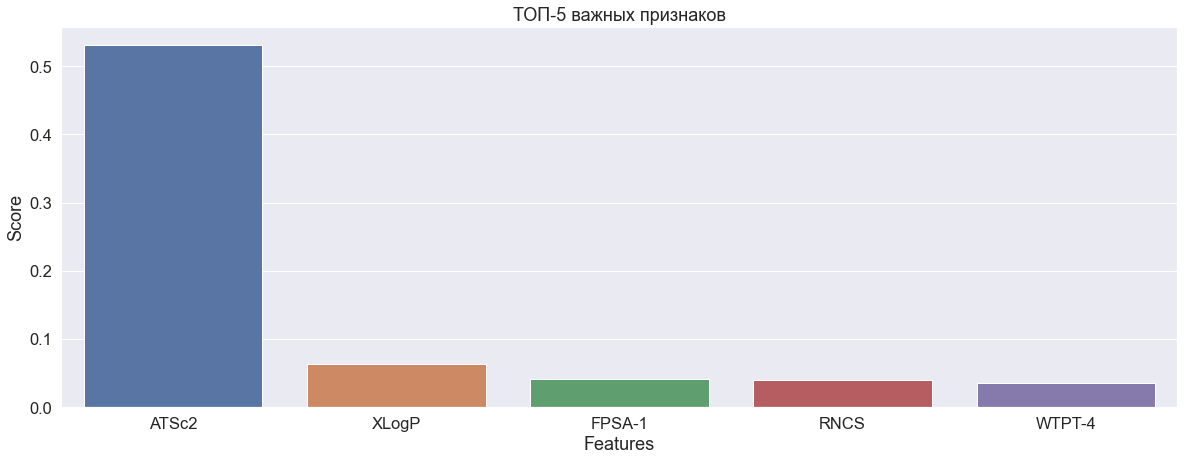

In [30]:
plt.figure(figsize=(20, 7))

sns.set(font_scale=1.5)
sns.barplot(x="Features", y="Score", data=perm_df[:5])
plt.title('ТОП-5 важных признаков')

plt.show()